In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<Axes: xlabel='class', ylabel='count'>

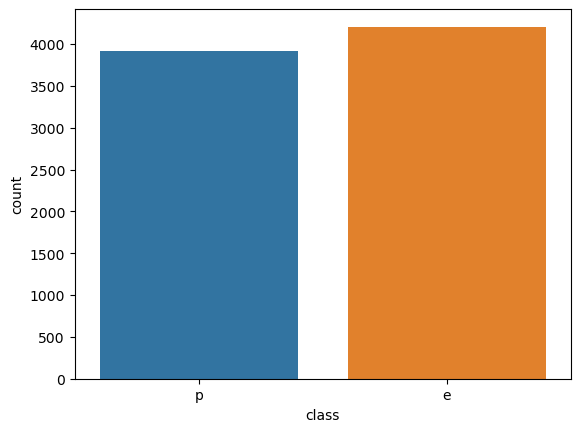

In [4]:
sns.countplot(data=df,x='class')

In [5]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [6]:
X = df.drop('class',axis=1)
X = pd.get_dummies(X,drop_first=True,dtype=int)
X

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [7]:
y = df['class']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [10]:
#Error rates are not improving after n_estimator 18

In [11]:
from sklearn.model_selection import GridSearchCV

In [13]:
param_grid = {"n_estimators":[1,5,10,20,40,100],'max_depth':[3,4,5,6],'learning_rate':[0.1,0.05,0.2,0.5]}

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,accuracy_score
boost_model = GradientBoostingClassifier()

In [15]:
grid = GridSearchCV(boost_model,param_grid)

In [16]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2, 0.5],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [17]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [18]:
predictions = grid.predict(X_test)

In [19]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [20]:
grid.best_estimator_.feature_importances_

array([2.91150176e-04, 4.36022062e-16, 0.00000000e+00, 0.00000000e+00,
       8.25914425e-17, 1.04902579e-03, 0.00000000e+00, 1.27734798e-06,
       1.80279501e-17, 0.00000000e+00, 1.16230618e-17, 7.28978253e-18,
       5.36130291e-17, 0.00000000e+00, 0.00000000e+00, 6.09987691e-05,
       2.31055039e-03, 5.19217556e-02, 1.84253604e-04, 1.03155339e-02,
       1.82499853e-02, 1.25630426e-03, 6.14744334e-01, 3.94907433e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.25092906e-02,
       1.07415714e-02, 0.00000000e+00, 5.43590107e-17, 0.00000000e+00,
       1.08107877e-17, 0.00000000e+00, 0.00000000e+00, 3.63006437e-18,
       9.72700414e-17, 0.00000000e+00, 1.62546868e-17, 1.66108609e-17,
       0.00000000e+00, 1.84407333e-03, 1.36047859e-01, 4.69032068e-03,
       4.69303857e-02, 4.47043435e-04, 1.43555976e-03, 1.15245842e-04,
       1.83319493e-05, 1.84176639e-06, 2.12685542e-02, 3.36708231e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [21]:
feat_import = grid.best_estimator_.feature_importances_

In [22]:
imp_feats = pd.DataFrame(index=X.columns,data=feat_import,columns=['Importance'])

In [23]:
imp_feats

,Importance
cap-shape_c,2.911502e-04
cap-shape_f,4.360221e-16
cap-shape_k,0.000000e+00
cap-shape_s,0.000000e+00
cap-shape_x,8.259144e-17
...,...
habitat_l,0.000000e+00
habitat_m,1.788879e-16
habitat_p,0.000000e+00
habitat_u,1.004851e-05


In [24]:
imp_feats.sort_values("Importance",ascending=False)

,Importance
odor_n,0.614744
stalk-root_c,0.136048
bruises_t,0.051922
stalk-root_r,0.046930
spore-print-color_r,0.030495
...,...
stalk-color-below-ring_e,0.000000
stalk-color-below-ring_g,0.000000
stalk-color-below-ring_o,0.000000
veil-color_o,0.000000


In [25]:
imp_feats.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Importance,95.0,0.010526,0.064669,0.0,0.0,7.501398e-08,0.000633,0.614744


In [26]:
imp_feats = imp_feats[imp_feats['Importance'] > 0.010526]

In [27]:
imp_feats.sort_values('Importance')

,Importance
gill-size_n,0.010742
spore-print-color_h,0.011066
gill-spacing_w,0.012509
odor_l,0.018250
stalk-surface-below-ring_y,0.021269
spore-print-color_r,0.030495
stalk-root_r,0.046930
bruises_t,0.051922
stalk-root_c,0.136048
odor_n,0.614744
